In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#load the dataset
df = pd.read_csv('/content/appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [8]:
#check for missing values
print(df.isnull().sum())
df.head()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201


Text(0, 0.5, 'Energy Consumption (kWh)')

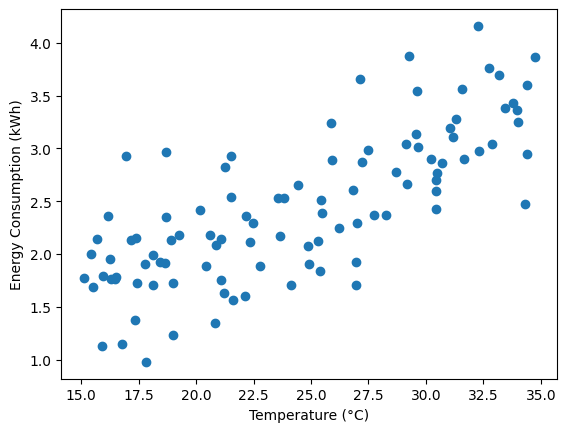

In [14]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')

In [16]:
#features (independent variables) and target (Dependent variables)
#independent variable
X = df[['Temperature (°C)']]
#dependent variable
y = df['Energy Consumption (kWh)']


In [18]:
#split the data into training and testing data
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
#create a linear regression model
model = LinearRegression()
#train the model
model.fit(x_train, y_train)


LinearRegression()

In [31]:
y_test.head()


,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [24]:
print("Slope: ",model.coef_)
print("y-intercept: ",model.intercept_)

Slope:  [0.08996618]
y-intercept:  0.22196391661907633


In [26]:
#y = mx+c
print(model.coef_* 22.49 +model.intercept_)

[2.24530337]


In [29]:
#make prediction on the test set
y_pred = model.predict(x_test)

In [30]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [32]:
#calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

#calculate r-squared error
r2 = r2_score(y_test, y_pred)
print("R-squared Error: ", r2)

Mean Squared Error:  0.16342487842925055
R-squared Error:  0.6119478445218713


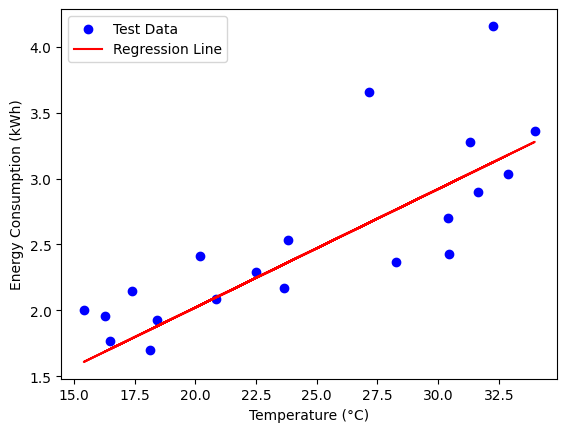

In [33]:
#plot the test data and regrssion line
plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.show()

In [34]:
#save model to file
import joblib
joblib.dump(model, 'energy_consumption_model.pkl')


['energy_consumption_model.pkl']

In [ ]:
#use this model for prediction


In [35]:
import joblib

# Load the saved model
model = joblib.load('energy_consumption_model.pkl')

# Create a DataFrame with the new temperature values for prediction
#new_data = pd.DataFrame({'Temperature (°C)': [25, 30, 35]})  # Replace with your desired temperatures

# Make predictions using the loaded model
#predictions = model.predict(new_data)

# Print the predictions
#print(predictions)

[2.47111849 2.9209494  3.37078032]


In [38]:
temp = np.array([[22.49]])

In [39]:
prediction = model.predict(temp)
print("Predicted Energy Consumption",prediction)

Predicted Energy Consumption [2.24530337]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
